In [ ]:
#####################################################################################
#      Alexandre GAZAGNES : My first Kaggle Kernel - staring Leonardo DiCaprio ? 
#####################################################################################

In [ ]:
# Hello and Welcome on bord! 

# This is my first kernel, and my first Kaggle competition. This kernel is written for newbies, many, many lines could be factorized but I decided to write the simplest and more readable code I could

# Of course if you want to propose to improve anything in the lines bellow, feel free to post a comment!

In [61]:
# import

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn.preprocessing import * 
from sklearn.model_selection import *
from sklearn.linear_model import * 
from sklearn.metrics import r2_score
from sklearn.ensemble import *

In [62]:
#  dataframe creation

train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

In [7]:
############################################################################
#        First round of exploration 
############################################################################


# in this part we will print and buid graph with a brutal approch. we won't try to have a complex analysis but just to 
# have a first and global vision of our dataset ! 

# let's print main info about train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.486428,0.523008,0.381594,32.767620
std,257.353842,0.486592,0.836071,14.472708,1.102743,0.806057,49.641829
min,1.000000,0.000000,1.000000,-6.981710,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
print(train_df.ndim)
print(train_df.shape)


2
(891, 12)


In [137]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df.describe()

In [139]:
print(test_df.ndim)
print(test_df.shape)

2
(418, 11)


In [142]:
# less rows in test_df, logical
# 1 feature missing in test_df, logical : our target

In [141]:
# from now we will focus on train_df

pd.DataFrame(train_df.dtypes, columns=["type"])

,type
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [63]:
# how many non unique values for each feature?
data = pd.DataFrame([len(train_df[feat].unique()) for feat in train_df.columns], columns=["unique values"], index=train_df.columns)
data.sort_values(by="unique values", ascending=False)

,unique values
PassengerId,891
Name,891
Ticket,681
Fare,248
Cabin,148
Age,89
SibSp,7
Parch,7
Embarked,4
Pclass,3


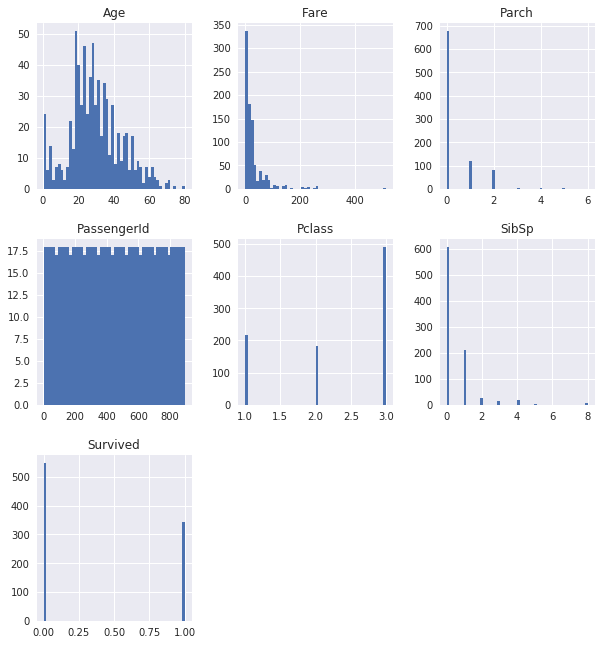

In [64]:
# Ok, nb of different values for PassengerID, Name, Ticket == nb of passenger, logical
# Sex, Survived, Emarked, Parch and SibSp looks like Categorcial features (?) to be confirmed...
# We will need to check Fare, Cabin, Tiket and Age...

# let's have a brutal distribution plot
_ = train_df.hist(grid=True,bins=50, figsize=(10,11))

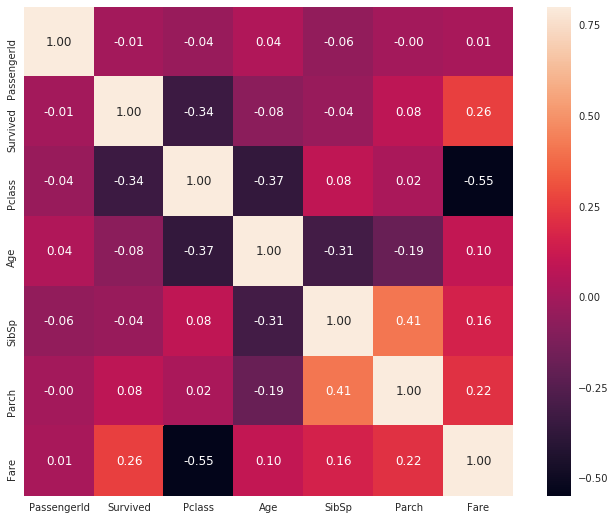

In [65]:
# ok, Fare, Parch, SibSp seems to have a log distribution fonction 
# Age +/- normal with positive skewness and kurosis (to be confirmed)
# Pclass and Survied definitively are categorical features

# abrutal corelation matrix ? let's go! 
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
_ = sns.heatmap(corrmat, vmax=.8, square=True, fmt='.2f', annot=True)

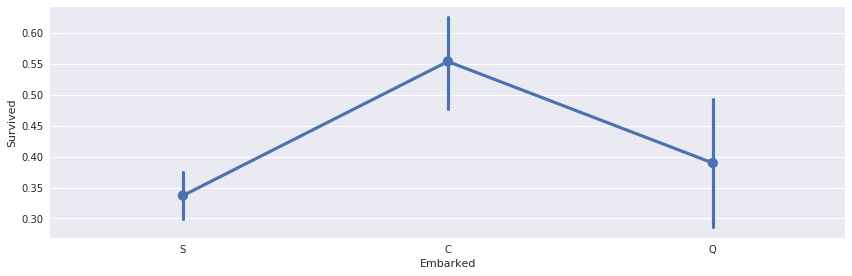

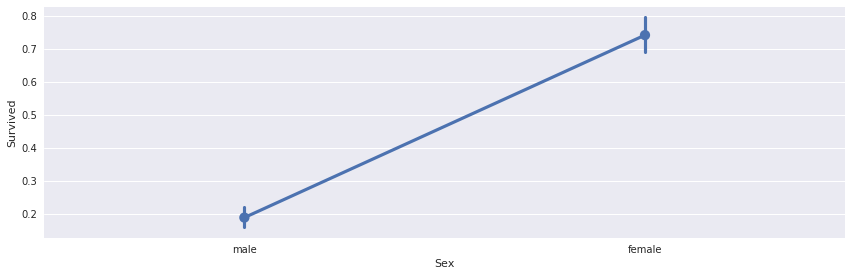

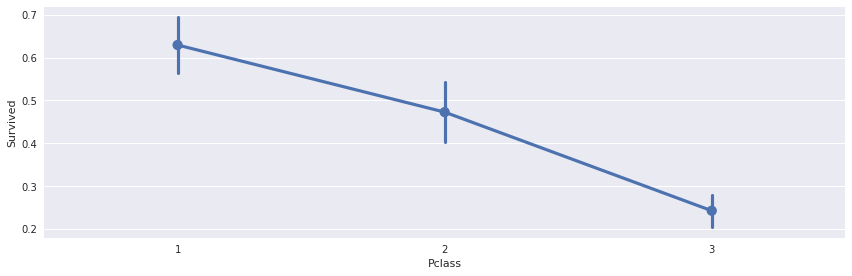

In [14]:
# Pclass has strong negative correlation with price, logical
# Survied has good correlation with Fare and Pclass, such a capitalist world 100 years before !:) 
# how about surprising relations? 
    # Age and Pclass? No ... compare people's age in a concert and in a opera for fun...
    # Parch / 1ge /SibSp ... seems to be logical but could be studied more deeply later
# Ok so noting outsanding

# as we said before, Pclass, Sex, and Embarqued are categorcial features, so let's work on this
for feat in ["Embarked", "Sex", "Pclass"] : 
    sns.factorplot(feat,'Survived', data=train_df,size=4,aspect=3)


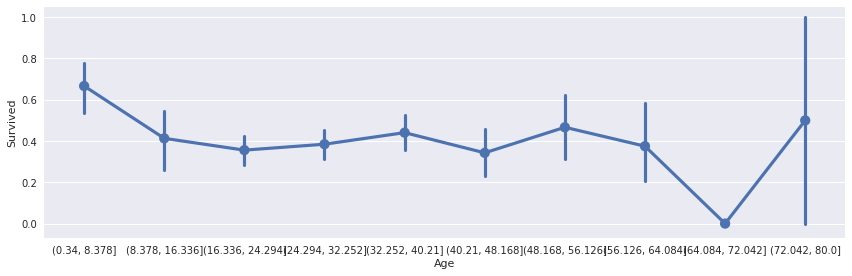

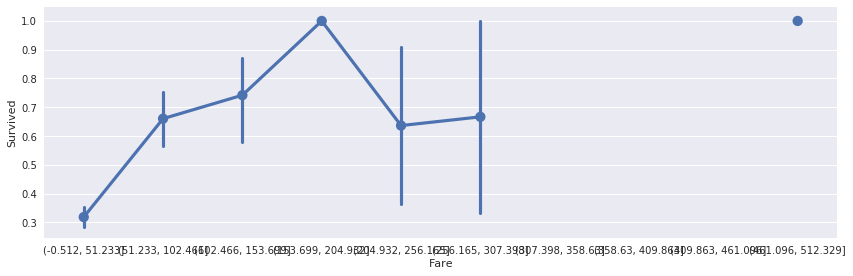

In [15]:
# Ok good, very good, we have very important features with very strong correlations to our target
# Just for fun we could compute the surviving rate of a woman in 1st class, 40+ years old, embarked at Cherbourg, but later :) 

# Can we learn something treating our continuous features as categrocial ones ? 
for feat in ["Age", "Fare", ] : 
    dat = pd.concat([pd.cut(train_df[feat], 10), train_df["Survived"]], axis=1)
    dat.columns = [feat, "Survived"]
    sns.factorplot(feat, "Survived", data=dat, size=4,aspect=3)

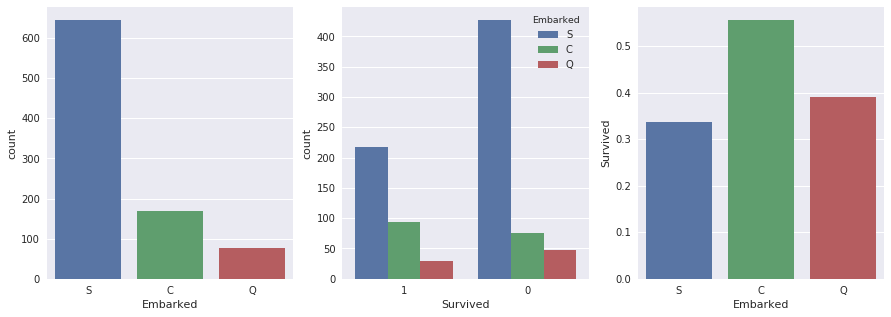

In [147]:
# Humm not very good ! 
# Seaborn is our freind? For sure! 

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=train_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train_df, order=[1,0], ax=axis2)

embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
_ = sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)


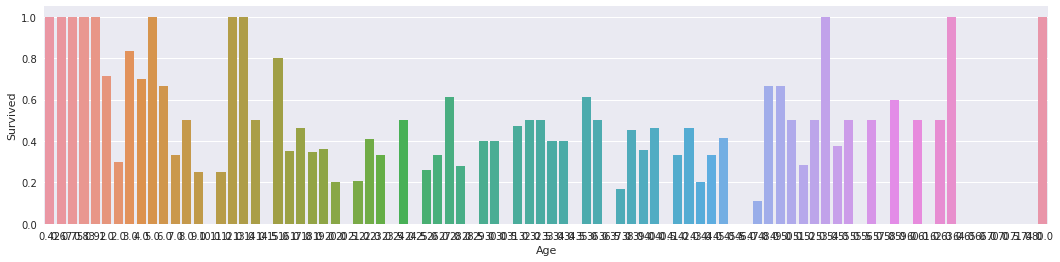

In [17]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
data = train_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
_ = sns.barplot(x="Age", y='Survived', data=data)

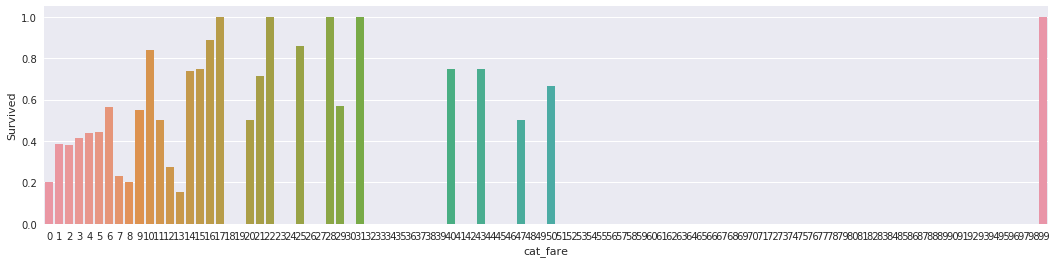

In [148]:
# average survived passengers by Fare
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
data = train_df.loc[:, ["Fare", "Survived", "Sex"]]
data["cat_fare"] = pd.cut(data["Fare"], 100, labels=range(100))
data = data[["cat_fare", "Survived"]].groupby(['cat_fare'],as_index=False).mean()
_ = sns.barplot(x='cat_fare', y='Survived', data=data)


In [66]:
############################################################################
#       Fihting against Missing / NaN values
############################################################################

#
#
#



# explore null/Nan values by col
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [67]:
# Cabin, 77% is a very high score, we would have to drop this feature
# Embarked : 0.2% very very low effect on the dataset, we will choose to fill the Nan with the most common value of the feature
# Age, this isproblematic because age is an very important feature, and 20% is a prety high score
# we could, for instance, fill missing values with the mean age of each sub category sorting by fare, sex, survived and pclass ...

# what about the testing dataset?

# explore null/Nan values by col
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [68]:
# we sould definitively delete "Cabin" ?
# we will use the same technique for Age and Fare than above

# just to be sure ...
data = train_df.loc[ : ,["Cabin", "Pclass", "Fare"]]
data.head(30).sort_values(by='Pclass', ascending=True)

,Cabin,Pclass,Fare
23,A6,1,35.5000
1,C85,1,71.2833
27,C23 C25 C27,1,263.0000
3,C123,1,53.1000
6,E46,1,51.8625
11,C103,1,26.5500
15,NaN,2,16.0000
20,NaN,2,26.0000
21,D56,2,13.0000
17,NaN,2,13.0000


In [69]:
# we could think that Pclass 3 is just a global common room or something like that, maybe we could confirm that with few web research but keep focus for now

# who are people without "Embarked" ?
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [70]:
# if we focus on people very similar, what can we learn? 
mask = (train_df["Survived"] ==  1) & (train_df["Pclass"] == 1) & (train_df["Sex"]=="female")  & (train_df["Parch"]==0)
data = train_df[mask].groupby("Embarked")
print(data.count())

          PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Embarked                                                                        
C                  32        32      32    32   32   27     32     32      32   
Q                   1         1       1     1    1    1      1      1       1   
S                  28        28      28    28   28   25     28     28      28   

          Fare  Cabin  
Embarked               
C           32     24  
Q            1      1  
S           28     24  


In [71]:
# 1% come from Q, and for the rest 50/50 from C and S
# we will respect that proportion

train_df.loc[61, "Embarked"] = "C"
train_df.loc[829, "Embarked"] = "S"

train_df["Embarked"].isnull().all() == False

True

In [72]:
# ok, what about test_df

test_df[test_df["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [73]:
# just on thought what about if Fare == 0 ?

test_df[test_df["Fare"] == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


In [74]:
# ouch we have a major issue ... 
# and for train_df
train_df[train_df["Fare"] == 0].sort_values(by="Pclass")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S


In [78]:
# re ouch ... what a mess 
# after few web resarch, we can leran than these people wer "sent by shipbuilders Harland & Wolff to accompany the Titanic on her maiden voyage." what a good gift ! :) :) 
# https://www.encyclopedia-titanica.org/titanic-guarantee-group/

# so is this missing value tricky, well not at all, we can fill missing value with average price of each class?

data = train_df.groupby("Pclass")
data = data.describe()["Fare"]
my_fare = (data["mean"] + data["50%"])/2
my_fare

Pclass
1    72.221094
2    17.456092
3    10.862775
dtype: float64

In [79]:
# now we can fill Fare with my_fare
for c in [1,2,3] : 
    mask = (train_df["Fare"] == 0.0 ) & (train_df["Pclass"] == c)  
    train_df.loc[mask, "Fare"] = int(my_fare[c])
    
    

In [80]:
# just to be sure : 
train_df[train_df["Fare"] == 0.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [81]:
train_df["Fare"].isnull().all() == False

True

In [82]:
# just to control : 
print(train_df.loc[302, ])
print(train_df.loc[263, ])

PassengerId                                303
Survived                                     0
Pclass                                       3
Name           Johnson, Mr. William Cahoone Jr
Sex                                       male
Age                                         19
SibSp                                        0
Parch                                        0
Ticket                                    LINE
Fare                                        10
Cabin                                      NaN
Embarked                                     S
Name: 302, dtype: object
PassengerId                      264
Survived                           0
Pclass                             1
Name           Harrison, Mr. William
Sex                             male
Age                               40
SibSp                              0
Parch                              0
Ticket                        112059
Fare                              72
Cabin                            B94
Emba

In [83]:
for c in [1,2,3] : 
    mask = ( (test_df["Fare"] == 0.0 ) | (test_df["Fare"].isnull()) ) & (test_df["Pclass"] == c)  
    test_df.loc[mask, "Fare"] = int(my_fare[c])

In [84]:
test_df[test_df["Fare"] == 0.0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [85]:
test_df["Fare"].isnull().all() == False

True

In [134]:
test_df[test_df["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [87]:
test_df.loc[266, ]

PassengerId                                     1158
Pclass                                             1
Name           Chisholm, Mr. Roderick Robert Crispin
Sex                                             male
Age                                              NaN
SibSp                                              0
Parch                                              0
Ticket                                        112051
Fare                                              72
Cabin                                            NaN
Embarked                                           S
Name: 266, dtype: object

In [88]:
test_df.loc[152, ]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                           10
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [89]:
# lets now deal with age,
# we will inpute random age rearding normal distribution

data = train_df[~train_df["Age"].isnull()]

In [90]:
data = train_df.loc[:, ["Age", "Pclass", "Sex"]].groupby(["Pclass", "Sex"])

In [91]:
data.describe()

Age                                                       
               count       mean        std   min     25%   50%    75%   max
Pclass Sex                                                                 
1      female   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       male    101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
2      female   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       male     99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
3      female  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
       male    253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

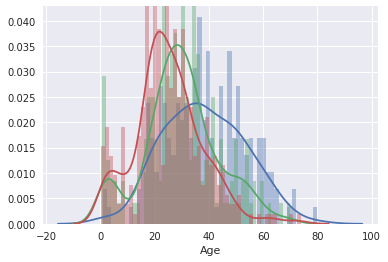

In [115]:
# we define our mean and std for each subclass

coef["female", 1] =  (34, 13)
coef["female", 2] = (28,12)
coef["female", 3] =  (21, 12)
coef["male", 1] = (41, 15)
coef["male", 2] = (30,15)
coef["male", 3] = (26, 12)


# we have to verify that each distribution is effectively normal : 

for cl in [1,2,3] : 
    age = train_df[~train_df["Age"].isnull()]
    age = age[age["Pclass"] == cl]
    sns.distplot(age["Age"], bins=50)

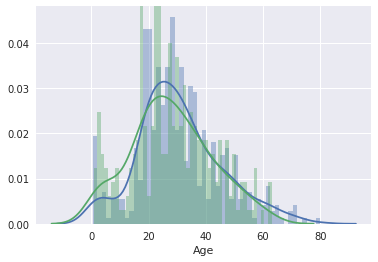

In [93]:
# good for class 

for sex in ["male", "female"] : 

    age = train_df[~train_df["Age"].isnull()]
    age = age[age["Sex"] == sex]
    sns.distplot(age["Age"], bins=50)

In [94]:
# good for sex

# we define our function to fill na
normal_dist = lambda x,mean, std : std * np.random.randn(x) + mean

In [106]:
# just a small print to check our values, and to test our  main loop

for sex in ["male", "female"] : 
    for cl in [1,2,3] : 
        mask = (train_df["Sex"] == sex) & (train_df["Pclass"] == cl) & (train_df["Age"].isnull())
        nb = len(train_df[mask])
        print(str(nb))
        print(train_df.loc[mask, ["Sex", "Pclass", "Age"]])

21
      Sex  Pclass  Age
55   male       1  NaN
64   male       1  NaN
168  male       1  NaN
185  male       1  NaN
270  male       1  NaN
284  male       1  NaN
295  male       1  NaN
298  male       1  NaN
351  male       1  NaN
475  male       1  NaN
507  male       1  NaN
527  male       1  NaN
557  male       1  NaN
602  male       1  NaN
633  male       1  NaN
711  male       1  NaN
740  male       1  NaN
766  male       1  NaN
793  male       1  NaN
815  male       1  NaN
839  male       1  NaN
9
      Sex  Pclass  Age
17   male       2  NaN
181  male       2  NaN
277  male       2  NaN
413  male       2  NaN
466  male       2  NaN
481  male       2  NaN
547  male       2  NaN
674  male       2  NaN
732  male       2  NaN
94
      Sex  Pclass  Age
5    male       3  NaN
26   male       3  NaN
29   male       3  NaN
36   male       3  NaN
42   male       3  NaN
45   male       3  NaN
46   male       3  NaN
48   male       3  NaN
65   male       3  NaN
76   male       3  NaN
77 

In [120]:
# we fill na

for sex in ["male", "female"] : 
    for cl in [1,2,3] : 
        mask = (train_df["Sex"] == sex) & (train_df["Pclass"] == cl) & (train_df["Age"].isnull())
        nb = len(train_df[mask])
        train_df.loc[mask, "Age"] = normal_dist(nb, coef[sex, cl][0], coef[sex, cl][1])

In [124]:
train_df["Age"].isnull().all() == False

True

In [130]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [131]:
test_df[test_df["Age"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [132]:
for sex in ["male", "female"] : 
    for cl in [1,2,3] : 
        mask = (test_df["Sex"] == sex) & (test_df["Pclass"] == cl) & (test_df["Age"].isnull())
        nb = len(test_df[mask])
        test_df.loc[mask, "Age"] = normal_dist(nb, coef[sex, cl][0], coef[sex, cl][1])

In [133]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [135]:
test_df["Age"].isnull().all() == False

True

In [136]:
# OK we have made a GREAT step !!! 
# we have no Nan/null values, 
# we were very prudent in filling na in order not to overfit or underfit in our futuress manipulations

# ONE GOOD THING TO DO COULD BE TO FILL FARE WITH THE SAME METHOD BUT IS IT VERY USEFULL? I DON'T KNOW'